# Download Images from Kaggle:

In [1]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Images download done.')

100%|██████████| 376M/376M [00:02<00:00, 141MB/s]

Extracting files...


Images download done.


# Import libraries

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm


# Images Category

In [5]:
print(os.listdir(dataset))

['animals', 'images']


In [6]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['panda', 'animals', 'dogs', 'images', 'cats']


In [7]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['panda', 'dogs', 'cats']


In [8]:
categories = os.listdir(dataset)
print(categories)

['panda', 'dogs', 'cats']


In [9]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['panda_00181.jpg', 'panda_00361.jpg', 'panda_00990.jpg', 'panda_00350.jpg', 'panda_00607.jpg', 'panda_00360.jpg', 'panda_00062.jpg', 'panda_00634.jpg', 'panda_00670.jpg', 'panda_00038.jpg', 'panda_00247.jpg', 'panda_00720.jpg', 'panda_00237.jpg', 'panda_00403.jpg', 'panda_00499.jpg', 'panda_00388.jpg', 'panda_00776.jpg', 'panda_00845.jpg', 'panda_00741.jpg', 'panda_00527.jpg', 'panda_00058.jpg', 'panda_00660.jpg', 'panda_00002.jpg', 'panda_00065.jpg', 'panda_00701.jpg', 'panda_00133.jpg', 'panda_00480.jpg', 'panda_00132.jpg', 'panda_00045.jpg', 'panda_00756.jpg', 'panda_00414.jpg', 'panda_00244.jpg', 'panda_00262.jpg', 'panda_00419.jpg', 'panda_00549.jpg', 'panda_00614.jpg', 'panda_00215.jpg', 'panda_00160.jpg', 'panda_00127.jpg', 'panda_00267.jpg', 'panda_00917.jpg', 'panda_00075.jpg', 'panda_00103.jpg', 'panda_00644.jpg', 'panda_00166.jpg', 'panda_00441.jpg', 'panda_00546.jpg', 'panda_00069.jpg', 'panda_00106.jpg', 'panda_00125.jpg', 'panda_00161.jpg', 'panda_00839.jpg', 'panda_005

# Train Images

In [11]:
import random

train_data = []


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

In order to prepare the training dataset, the computer processes photographs from three different categories: pandas, cats, and dogs.  The process starts by initializing train_data, an empty list that will hold the processed photos and the labels that go with them.

 The application obtains all picture file names for each category, creates the path to the image directory, and then shuffles them to provide randomization.  To maintain a balanced and controllable dataset size, it chooses the first 100 photos from this shuffled collection.

 After that, each chosen image is read, shrunk to a consistent 100x100 pixel size, and converted to grayscale to remove color information.  Following processing, the image is appended to the train_data list along with a numerical label that denotes its category.  The dataset ultimately has 300 photos in total.

 After that, each chosen image is read, shrunk to a consistent 100x100 pixel size, and converted to grayscale to remove color information.  Following processing, the image is appended to the train_data list along with a numerical label that denotes its category.  By the end, the dataset has 300 photos in total, 100 in each category, that are prepared for the classification model to be trained.

In [12]:
#the code shuffles the `train_data` list and then prints the labels of the first 10 images after the shuffle, showing the class labels of those images.
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[2, 2, 2, 0, 0, 1, 0, 1, 2, 1]


# Show the Images

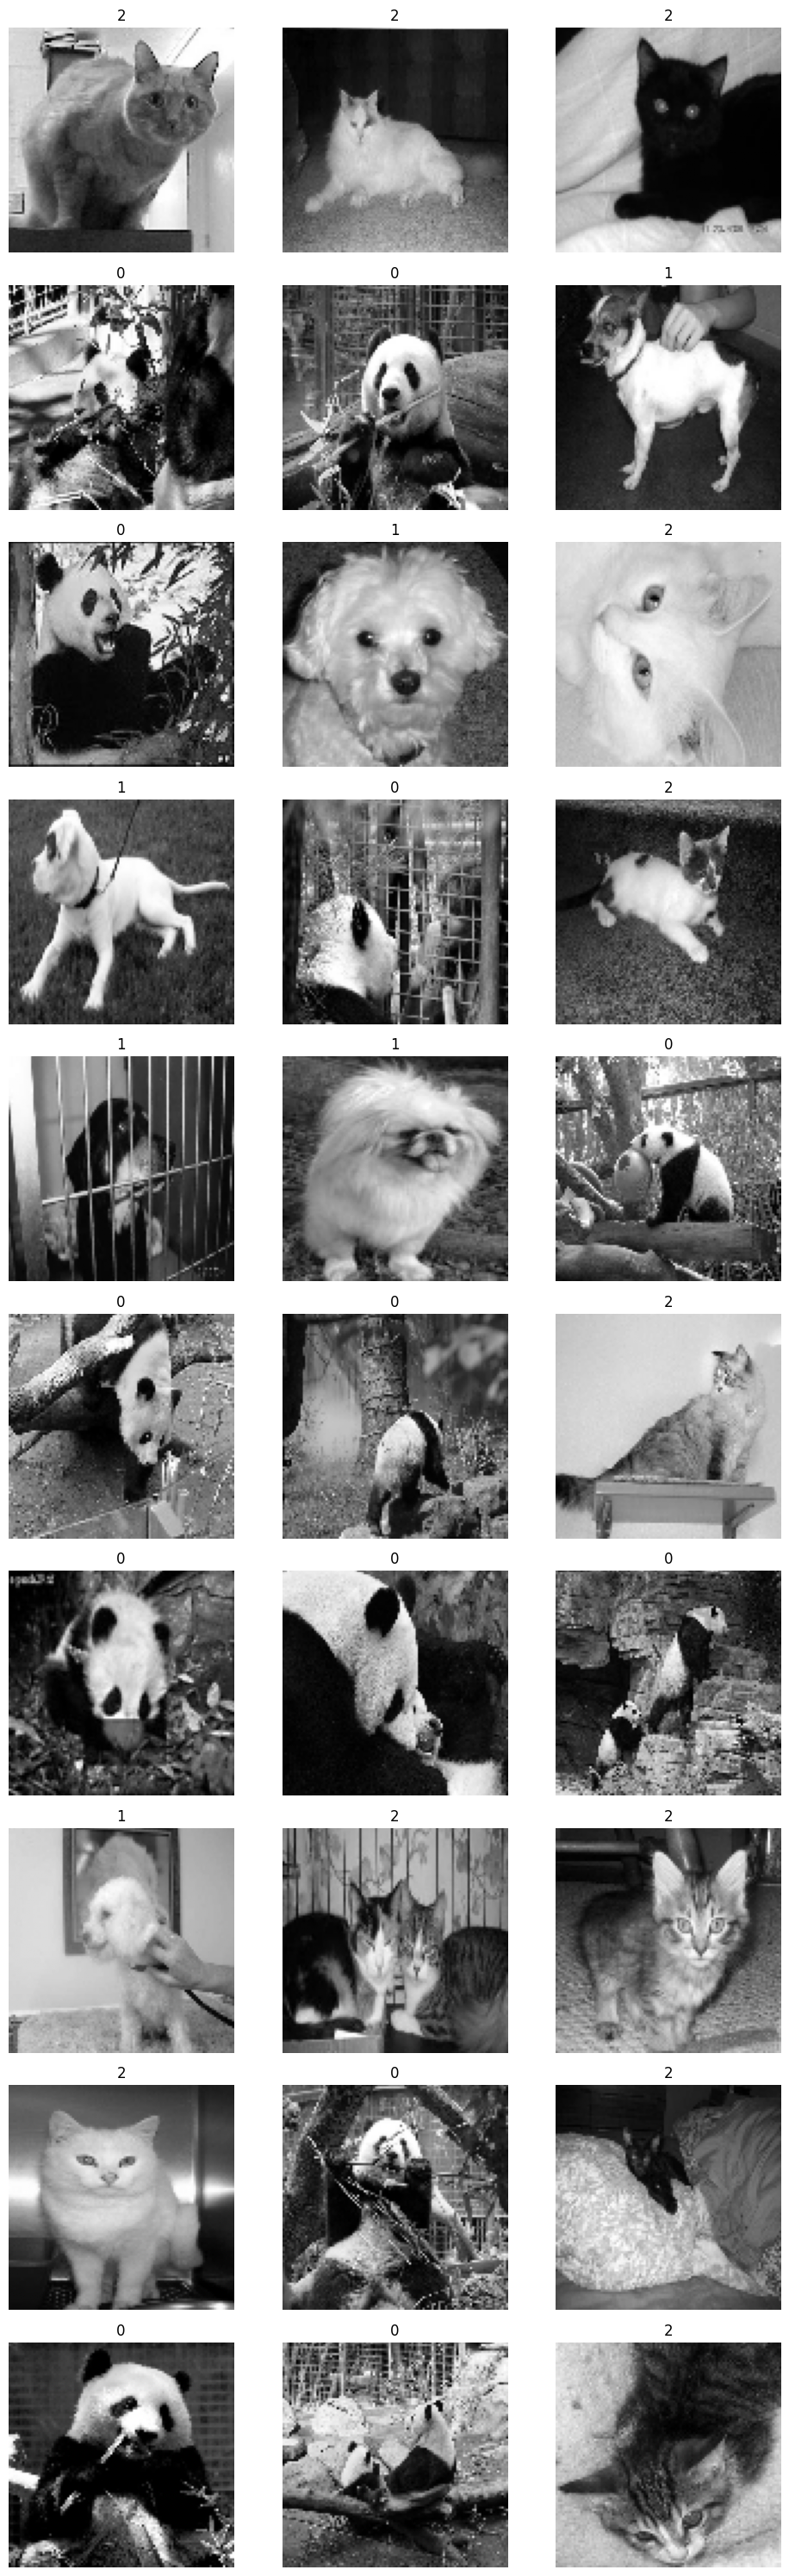

In [13]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

A 3x3 grid of grayscale photographs from the dataset is displayed using this code using Matplotlib. Each image is coupled with a label that denotes the type of animal—0 for a panda, 1 for a dog, and 2 for cat.  Examining a sample of the training data visually and comprehending how the images relate to their respective classes is the goal.

 The code plots each image in a subplot by iterating through the train_data, assigning the label as the title above each image using ax.set_title(label).  Without any color alteration, the photographs are displayed in their original grayscale format, giving viewers a clear look.  Understanding the structure of the dataset and making sure the labels accurately correspond with the visual content are made easier with the help of this type of visualization.

# Separate Images

In [14]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

In [15]:

# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]
    labels = [label for _, label in fold]
    print(f"Fold {fold_index + 1}:")
    print(f"Labels: {labels}")

Fold 1:
Labels: [2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0]
Fold 2:
Labels: [2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2]
Fold 3:
Labels: [2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0]
Fold 4:
Labels: [0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2]
Fold 5:
Labels: [0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1]


In [17]:
def l2_distance(valid_img, train_img):

    difference = valid_img - train_img


    squared_difference = np.square(difference)


    summed_squares = np.sum(squared_difference)


    distance = np.sqrt(summed_squares)


    return distance


def l1_distance(valid_img, train_img):

    difference = np.abs(valid_img - train_img)


    distance = np.sum(difference)


    return distance


In [18]:

from collections import Counter
def knn_prediction(distances, k=1):

    nearest_neighbors = distances[:k]


    labels = [label for _, label in nearest_neighbors]


    label_counts = Counter(labels)


    most_common_label = label_counts.most_common(1)[0][0]


    return most_common_label


# Accuracy calculate

      Add blockquote

In [19]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")



K = 1:
  Average Accuracy: 0.42

K = 2:
  Average Accuracy: 0.42

K = 3:
  Average Accuracy: 0.45

K = 4:
  Average Accuracy: 0.46

K = 5:
  Average Accuracy: 0.51

K = 6:
  Average Accuracy: 0.49

K = 7:
  Average Accuracy: 0.52

K = 8:
  Average Accuracy: 0.52

K = 9:
  Average Accuracy: 0.54

K = 10:
  Average Accuracy: 0.52

K = 11:
  Average Accuracy: 0.54

K = 12:
  Average Accuracy: 0.51

K = 13:
  Average Accuracy: 0.53

K = 14:
  Average Accuracy: 0.52

K = 15:
  Average Accuracy: 0.52

K = 16:
  Average Accuracy: 0.54

K = 17:
  Average Accuracy: 0.56

K = 18:
  Average Accuracy: 0.54

K = 19:
  Average Accuracy: 0.57

K = 20:
  Average Accuracy: 0.59

K = 21:
  Average Accuracy: 0.57

K = 22:
  Average Accuracy: 0.56

K = 23:
  Average Accuracy: 0.58

K = 24:
  Average Accuracy: 0.58

K = 25:
  Average Accuracy: 0.59

K = 26:
  Average Accuracy: 0.58

K = 27:
  Average Accuracy: 0.58

K = 28:
  Average Accuracy: 0.60

K = 29:
  Average Accuracy: 0.58

K = 30:
  Average Accu

In [20]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.37

K = 2:
  Average Accuracy: 0.37

K = 3:
  Average Accuracy: 0.40

K = 4:
  Average Accuracy: 0.37

K = 5:
  Average Accuracy: 0.36

K = 6:
  Average Accuracy: 0.38

K = 7:
  Average Accuracy: 0.38

K = 8:
  Average Accuracy: 0.39

K = 9:
  Average Accuracy: 0.41

K = 10:
  Average Accuracy: 0.38

K = 11:
  Average Accuracy: 0.39

K = 12:
  Average Accuracy: 0.37

K = 13:
  Average Accuracy: 0.36

K = 14:
  Average Accuracy: 0.38

K = 15:
  Average Accuracy: 0.38

K = 16:
  Average Accuracy: 0.40

K = 17:
  Average Accuracy: 0.40

K = 18:
  Average Accuracy: 0.40

K = 19:
  Average Accuracy: 0.40

K = 20:
  Average Accuracy: 0.40

K = 21:
  Average Accuracy: 0.41

K = 22:
  Average Accuracy: 0.40

K = 23:
  Average Accuracy: 0.40

K = 24:
  Average Accuracy: 0.40

K = 25:
  Average Accuracy: 0.42

K = 26:
  Average Accuracy: 0.39

K = 27:
  Average Accuracy: 0.42

K = 28:
  Average Accuracy: 0.38

K = 29:
  Average Accuracy: 0.39

K = 30:
  Average Accu

# Show the graph

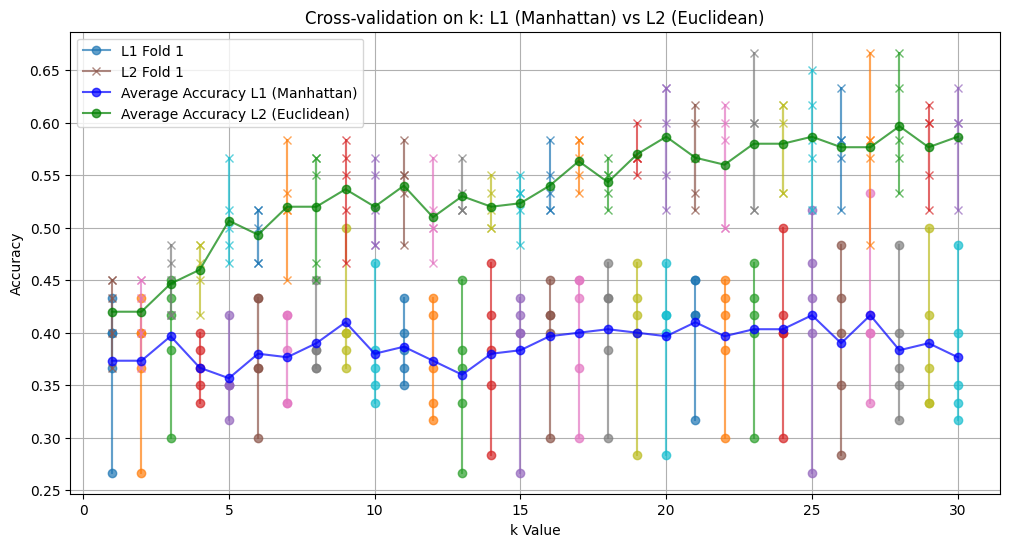

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In this graph, two distinct distance metrics are used to compare the k-Nearest Neighbors (k-NN) algorithm's classification performance:

 Manhattan distance, or L1

 Euclidean distance, or L2

 The values of k (number of neighbors), which range from 1 to 30, are represented by the X-axis.

 Y-axis: Displays the accuracy of classification for every k value.

 Important Notes: The average performance line and individual fold accuracies are displayed alongside the blue L1 (Manhattan distance).

 With fold accuracies and average performance plotted similarly, L2 (Euclidean distance) is displayed in green.

 For almost all values of k, L2 performs better on average than L1, outperforming L1 consistently.

 At k = 20–25, L2 performs at its best, with accuracy above 60%.
 On the other hand, for all k values, L1 accuracy remains below 45%.
In conclusion, the Euclidean distance (L2) is the better metric in our k-NN implementation since it works better for this dataset and task than the Manhattan distance (L1).